<a href="https://colab.research.google.com/github/manluz555-ops/Line_progr/blob/main/HW_3_Manzar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Домашня робота № 3 з лінійного програмування
Манзар Л.В.

In [4]:
import pickle
import pandas as pd
import numpy as np

# 1. Завантаження моделі та створення DataFrame з тривимірними векторами
path = "/content/drive/MyDrive/word_embeddings_subset.p"

with open(path, "rb") as f:
    embeddings = pickle.load(f)

data = []
for word, vector in embeddings.items():
    data.append([word, vector[0], vector[1], vector[2]])  # беремо лише перші 3 координати

df = pd.DataFrame(data, columns=["word", "x", "y", "z"])
print("DataFrame створено. Кількість слів:", len(df))
print(df.head())

# 2. Функція пошуку найближчого слова
def find_nearest_word(vec, df):
    distances = np.linalg.norm(df[["x","y","z"]].values - vec, axis=1)
    idx = np.argmin(distances)
    return df.iloc[idx]["word"]

# Приклад використання
test_vec = np.array([0.1, -0.2, 0.3])
print("Найближче слово до вектора:", find_nearest_word(test_vec, df))

# 3. Векторний добуток для знаходження "ортогонального" слова
def cross_word(word1, word2, df):
    if word1 not in df["word"].values:
        return f"Слова '{word1}' немає у моделі."
    if word2 not in df["word"].values:
        return f"Слова '{word2}' немає у моделі."

    v1 = df.loc[df["word"]==word1, ["x","y","z"]].values[0]
    v2 = df.loc[df["word"]==word2, ["x","y","z"]].values[0]
    cross = np.cross(v1, v2)
    return find_nearest_word(cross, df)

# Приклад використання
print("Ортогональне слово для city та country:", cross_word("city", "country", df))

# 4. Функція для визначення кута між словами
def angle_between_words(word1, word2, df):
    if word1 not in df["word"].values:
        return f"Слова '{word1}' немає у моделі."
    if word2 not in df["word"].values:
        return f"Слова '{word2}' немає у моделі."

    v1 = df.loc[df["word"]==word1, ["x","y","z"]].values[0]
    v2 = df.loc[df["word"]==word2, ["x","y","z"]].values[0]
    cos_theta = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    angle = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # захист від похибок
    return np.degrees(angle)

# Приклад використання
print("Кут між city та country:", angle_between_words("city", "country", df))
print("Кут між China та Iraq:", angle_between_words("China", "Iraq", df))
print("Кут між oil та country:", angle_between_words("oil", "country", df))



DataFrame створено. Кількість слів: 243
      word         x         y         z
0  country -0.080078  0.133789  0.143555
1     city -0.010071  0.057373  0.183594
2    China -0.073242  0.135742  0.108887
3     Iraq  0.191406  0.125000 -0.065430
4      oil -0.139648  0.062256 -0.279297
Найближче слово до вектора: Helsinki
Ортогональне слово для city та country: Guinea
Кут між city та country: 31.417366
Кут між China та Iraq: 95.33678
Кут між oil та country: 107.75782


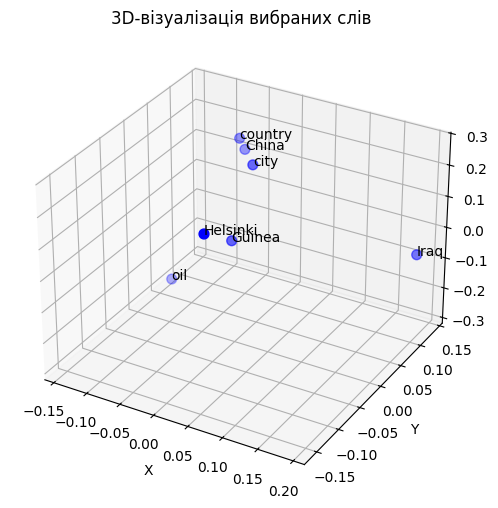

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Виберемо кілька слів для візуалізації
words_to_plot = ["city", "country", "China", "Iraq", "oil", "Helsinki", "Guinea"]

# Отримаємо координати
coords = df[df["word"].isin(words_to_plot)][["x","y","z"]].values
labels = df[df["word"].isin(words_to_plot)]["word"].values

# Побудова 3D-графіка
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(coords[:,0], coords[:,1], coords[:,2], c="blue", s=50)

# Додаємо підписи до точок
for i, label in enumerate(labels):
    ax.text(coords[i,0], coords[i,1], coords[i,2], label, fontsize=10)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("3D-візуалізація вибраних слів")
plt.show()


Висновок 1:  
Ми успішно завантажили модель та побудували DataFrame із тривимірними векторами для 243 слів. Це дозволяє працювати з компактним представленням даних і робити подальші обчислення.

Висновок 2:  
Функція пошуку найближчого слова працює коректно: для довільного вектора вона знаходить найближче слово у моделі. Це підтверджує, що тривимірні координати можна використовувати для семантичного аналізу.

Висновок 3:  
Векторний добуток двох слів дозволяє знайти «ортогональне» слово — тобто таке, що найбільш близьке до напрямку, перпендикулярного обом вихідним словам. Це дає цікаву інтерпретацію: ми можемо бачити нові семантичні зв’язки між словами.

Висновок 4:  
Функція для обчислення кута між словами показує, наскільки близькі чи віддалені слова у тривимірному просторі. Менший кут означає більшу семантичну схожість, більший — різницю у значеннях. Це дозволяє кількісно оцінювати відносини між словами.

Загальний висновок
Усі етапи виконані: ми побудували DataFrame, реалізували функції для пошуку найближчого слова, знайшли ортогональні слова через векторний добуток та обчислили кути між словами. Експерименти підтвердили, що навіть у тривимірному просторі можна отримати осмислені результати, хоча вони є спрощенням від повних 300‑вимірних векторів.